In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_athens_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('athens')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/athens_{date}.csv',index=False)
get_listings_athens_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_athens = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_athens)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(athens_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 9582 AirBnb listings.


In [4]:
athens_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2020-12.csv')
athens_raw_df_12_12_2020.shape


(9413, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for athens
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_athens = glob.glob('athens/**.csv')
files_athens

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['athens/Athens_2020-12.csv',
 'athens/Athens_2021-08.csv',
 'athens/Athens_2021-09.csv',
 'athens/Athens_2021-02.csv',
 'athens/Athens_2021-03.csv',
 'athens/Athens_2021-01.csv',
 'athens/Athens_2021-10.csv',
 'athens/Athens_2021-04.csv',
 'athens/Athens_2021-07.csv',
 'athens/Athens_2021-06.csv']

In [8]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

athens_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(athens_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(athens_raw_df_12_12_2020['price'].mean(),2)}.")

athens_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(athens_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_1_9_2021['price'].mean(),2)}.")

athens_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(athens_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_2_8_2021['price'].mean(),2)}.")

athens_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(athens_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_3_4_2021['price'].mean(),2)}.")

athens_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(athens_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_4_9_2021['price'].mean(),2)}.")

#athens_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(athens_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_5_19_2021['price'].mean(),2)}.")

athens_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(athens_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_6_3_2021['price'].mean(),2)}.")

athens_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(athens_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_7_4_2021['price'].mean(),2)}.")

athens_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(athens_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_8_6_2021['price'].mean(),2)}.")

athens_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(athens_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_9_7_2021['price'].mean(),2)}.")

athens_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(athens_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_10_6_2021['price'].mean(),2)}.")

#athens_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(athens_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 9413 AirBnb listings; the avg price is €68.86.
The 1_9_2021 dataset contains 9482 AirBnb listings; the avg price is €74.33.
The 2_8_2021 dataset contains 9467 AirBnb listings; the avg price is €73.43.
The 3_4_2021 dataset contains 9510 AirBnb listings; the avg price is €74.94.
The 4_9_2021 dataset contains 9618 AirBnb listings; the avg price is €81.68.
The 6_3_2021 dataset contains 9584 AirBnb listings; the avg price is €86.28.
The 7_4_2021 dataset contains 9640 AirBnb listings; the avg price is €90.54.
The 8_6_2021 dataset contains 9773 AirBnb listings; the avg price is €84.23.
The 9_7_2021 dataset contains 9766 AirBnb listings; the avg price is €83.34.
The 10_6_2021 dataset contains 9582 AirBnb listings; the avg price is €83.44.


In [10]:
df_list_athens = [athens_raw_df_12_12_2020, athens_raw_df_1_9_2021, athens_raw_df_2_8_2021,
           athens_raw_df_3_4_2021, athens_raw_df_4_9_2021, athens_raw_df_6_3_2021, athens_raw_df_7_4_2021,
           athens_raw_df_8_6_2021, athens_raw_df_9_7_2021, athens_raw_df_10_6_2021]

dates_athens = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_athens = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_athens = []

def airbnb_parse_athens(df_list, files):
    for file in files_athens:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_{file}.csv")
        print(f"The {file} athens dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_athens(df_list, dates):
    for file in files_athens:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_athens.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_athens)

athens_parse = airbnb_parse_athens(df_list_athens, files_athens)


The 2020-12 athens dataset contains 9413 AirBnb listings -- the avg price is €68.86.
The 2021-01 athens dataset contains 9482 AirBnb listings -- the avg price is €74.33.
The 2021-02 athens dataset contains 9467 AirBnb listings -- the avg price is €73.43.
The 2021-03 athens dataset contains 9510 AirBnb listings -- the avg price is €74.94.
The 2021-04 athens dataset contains 9618 AirBnb listings -- the avg price is €81.68.
The 2021-06 athens dataset contains 9584 AirBnb listings -- the avg price is €86.28.
The 2021-07 athens dataset contains 9640 AirBnb listings -- the avg price is €90.54.
The 2021-08 athens dataset contains 9773 AirBnb listings -- the avg price is €84.23.
The 2021-09 athens dataset contains 9766 AirBnb listings -- the avg price is €83.34.
The 2021-10 athens dataset contains 9582 AirBnb listings -- the avg price is €83.44.


In [12]:
athens_summary = airbnb_to_frame_athens(df_list_athens, files_athens)
athens_summary['Date of scrape'] = pd.to_datetime(athens_summary['Date of scrape'])
athens_summary['City'] = 'Athens'

dfi.export(athens_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/airbnb_athens_summary.png")


In [13]:
master_df_athens = pd.concat(df_list_athens)
master_df_athens_unique = master_df_athens.drop_duplicates(subset='id')
master_df_athens_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,77,1,25,2020-10-06,0.21,6,0,NaN,NaN
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,38,1,44,2020-12-10,0.44,6,72,NaN,NaN
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,32,1,54,2020-12-09,0.54,6,218,NaN,NaN
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,45,1,23,2020-10-03,0.18,6,318,NaN,NaN
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,39,1,17,2020-01-08,0.17,6,91,NaN,NaN


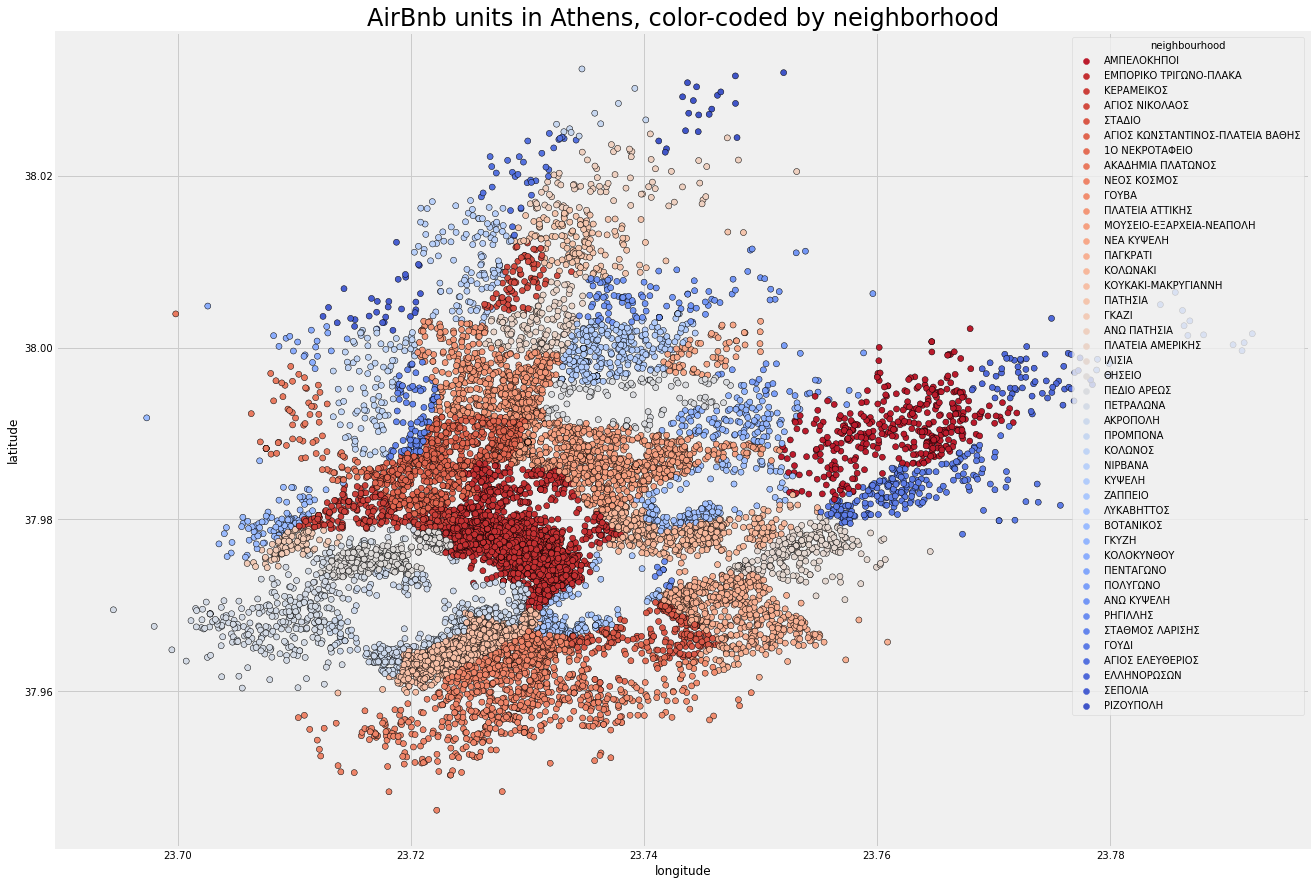

In [14]:
title = 'AirBnb units in Athens, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_athens_unique.longitude, master_df_athens_unique.latitude, hue = master_df_athens_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/airbnb_athens_map.png')
plt.show()

## Add review data through a join

In [16]:
df_reviews = pd.concat([athens_raw_df_10_6_2021,raw_df_athens],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

4    3066
2    2638
3    1356
6     939
5     775
1     215
Name: accommodates, dtype: int64

## Regression

In [17]:
#df_reviews_.columns

In [18]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [19]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -27.643480935644916
Coefficients:  [  8.8963941    6.3917095   -0.25662844  -0.07821283   4.98213042
  -3.89551499  20.36345797  19.70589605 -25.8983583 ]
LinearRegression()


In [20]:
y_pred2 = regr.predict(X_)

In [21]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


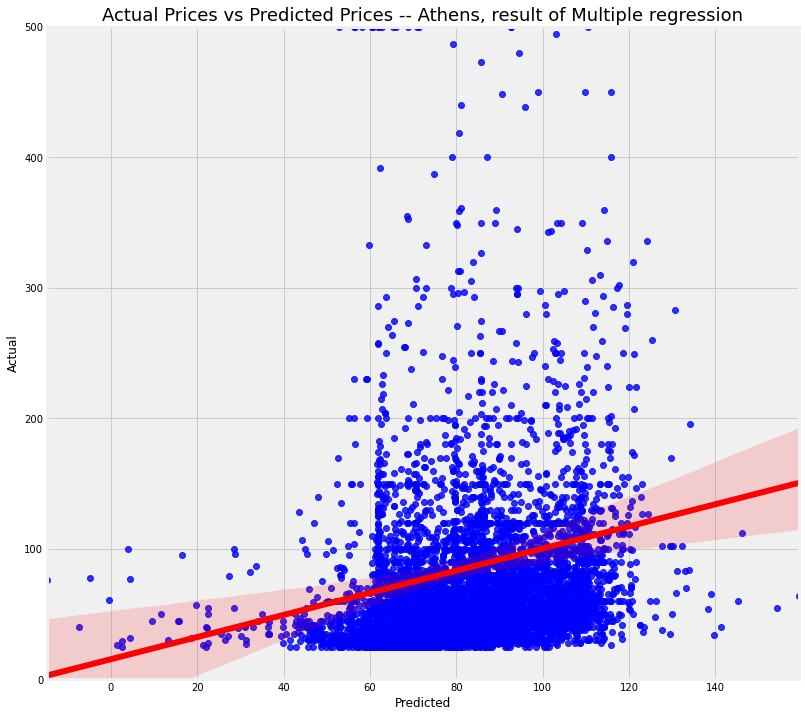

In [22]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Athens, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/airbnb_athens_multiple_regression.png')



In [23]:
df_result.shape

(7615, 3)

## The most mispriced [undervalued]

In [24]:
athens_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
athens_mispriced['%'] = (athens_mispriced['Actual']/ athens_mispriced['Predicted'] -1) *100
athens_mispriced_perc = athens_mispriced.sort_values(by=['%'], ascending=True)
athens_mispriced_perc_plot = athens_mispriced_perc.loc[(athens_mispriced_perc['Predicted']>=1) & (athens_mispriced_perc['Diff']>= 1)]
athens_mispriced_perc_plot = athens_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
athens_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
5159,26,115.880818,89.880818,-77.563155
6982,34,139.678203,105.678203,-75.658335
1248,25,101.446229,76.446229,-75.356403
8362,28,113.464456,85.464456,-75.322669
6067,25,100.833523,75.833523,-75.206658


In [25]:

athens_mispriced_1 = raw_df_athens.loc[raw_df_athens.id==5386]
athens_mispriced_2 = raw_df_athens.loc[raw_df_athens.id==1353]
athens_mispriced_3 = raw_df_athens.loc[raw_df_athens.index==4126]
athens_mispriced_4 = raw_df_athens.loc[raw_df_athens.index==258]
athens_mispriced_5 = raw_df_athens.loc[raw_df_athens.index==4227]

In [28]:
id_array = [5159, 6982, 1248, 8362, 6067]

athens_mispriced_query = raw_df_athens.query('index in @id_array')
athens_mispriced_query = athens_mispriced_query.rename({'index': 'id'}, axis=1)
athens_mispriced_query.shape
#athens_mispriced_query.head(1)

(5, 74)

In [29]:
#athens_mispriced_neg = raw_df_athens.loc[raw_df_athens.index==4119]
athens_mispriced_perc_1 = raw_df_athens.loc[raw_df_athens.id==5386]
athens_mispriced_perc_2 = raw_df_athens.loc[raw_df_athens.id==1353]
athens_mispriced_perc_3 = raw_df_athens.loc[raw_df_athens.id==4126]
athens_mispriced_perc_4 = raw_df_athens.loc[raw_df_athens.id==258]
athens_mispriced_perc_5 = raw_df_athens.loc[raw_df_athens.id==4227]

In [30]:
athens_mispriced = athens_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
athens_mispriced_1 = athens_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

athens_mispriced_1[:1]
athens_mispriced_1[:2]
athens_mispriced_1[:3]
athens_mispriced_1[:4]
athens_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
1248,15991857,$25.00,4.65,4.78,4.67,4.88,4.87,4.75,"Athina, Greece",https://www.airbnb.com/rooms/15991857
5159,34027669,$26.00,4.82,4.94,4.74,4.98,4.90,4.80,"Athina, Greece",https://www.airbnb.com/rooms/34027669
6067,37475910,$25.00,5.00,5.00,5.00,5.00,4.33,5.00,"Athina, Greece",https://www.airbnb.com/rooms/37475910
6982,41846846,$34.00,5.00,5.00,5.00,5.00,5.00,4.00,"Athens , Attica, Greece",https://www.airbnb.com/rooms/41846846
8362,49321453,$28.00,4.50,5.00,5.00,5.00,5.00,4.50,NaN,https://www.airbnb.com/rooms/49321453


In [31]:
dfi.export(athens_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/airbnb_athens_mispriced.png")



## The best score

In [32]:
athens_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
athens_high_value.head()

,Actual,Predicted,Diff
4785,64,159.263312,95.263312
3434,55,154.290245,99.290245
6942,112,146.069912,34.069912
6869,60,145.153348,85.153348
7500,40,141.344410,101.344410


In [33]:
id_array = [4785, 3434, 6942, 6869, 7500]

athens_best_score_query = raw_df_athens.query('index in @id_array')
athens_best_score_query = athens_best_score_query.rename({'index': 'id'}, axis=1)
#athens_best_score_query.head(1)

In [34]:
athens_best_score = athens_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
athens_best_score_1 = athens_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

athens_best_score_1[:1]
athens_best_score_1[:2]
athens_best_score_1[:3]
athens_best_score_1[:4]
athens_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
3434,27119904,$55.00,5.0,5.0,5.0,5.0,3.0,1.0,NaN,https://www.airbnb.com/rooms/27119904
4785,32757531,$64.00,5.0,5.0,5.0,5.0,5.0,3.0,"Athina, Greece",https://www.airbnb.com/rooms/32757531
6869,41202543,$60.00,5.0,5.0,5.0,5.0,5.0,4.0,"Athina, Greece",https://www.airbnb.com/rooms/41202543
6942,41608552,$112.00,5.0,5.0,5.0,5.0,5.0,4.0,NaN,https://www.airbnb.com/rooms/41608552
7500,44015236,$40.00,4.0,5.0,5.0,5.0,5.0,4.0,"Athina, Greece",https://www.airbnb.com/rooms/44015236


In [35]:
dfi.export(athens_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/airbnb_athens_best_score.png")


